In [ ]:
# Installation of Libraries 

In [1]:
pip install yfinance
pip install pandas
pip install numpy
pip install matplotlib.plyplot

  Created wheel for multitasking: filename=multitasking-0.0.10-py3-none-any.whl size=8500 sha256=09942607c9148a9940c8740578e27b3d5995db1bebc7c7ca92035583491d058b
  Stored in directory: c:\users\paras\appdata\local\pip\cache\wheels\f2\b5\2c\59ba95dcf854e542944c75fe3da584e4e3833b319735a0546c
Successfully built multitasking
Note: you may need to restart the kernel to use updated packages.


In [5]:
#Importing of all Librabries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

In [4]:
#Taking equity stocks from 2 wheeler and 4 wheeler segment of Indian Automobile Sector
tickers=['MARUTI.NS','TATAMOTORS.NS','M&M.NS','ASHOKLEY.NS','HEROMOTOCO.NS','TVSMOTOR.NS']

In [158]:
# Downloading the data from yahoo finance 
start_date='2010-12-31'  # < -- Start Date
end_date='2022-05-10'    # < -- End   Date
data=yf.download(tickers,start=start_date,end=end_date)
portfolio=data.Close

[*********************100%***********************]  6 of 6 completed


In [186]:
#Changing Columns Name for better understandinf about stocks
company_names=['Ashok Leyland','Hero Motors Corp','Mahindra','Maruti Suzuki','Tata Motors','TVS Motors']
portfolio.columns=company_names
portfolio.head()

,Ashok Leyland,Hero Motors Corp,Mahindra,Maruti Suzuki,Tata Motors,TVS Motors
Date,,,,,,
2010-12-31,32.000000,1988.150024,389.100006,1421.599976,258.893097,70.699997
2011-01-03,33.450001,1986.599976,393.774994,1426.050049,258.912903,72.849998
2011-01-04,33.775002,1979.349976,390.625000,1428.750000,256.924225,71.849998
2011-01-05,32.750000,1903.400024,385.524994,1412.449951,253.837341,69.599998
2011-01-06,32.575001,1886.250000,385.625000,1373.900024,249.523605,66.000000


In [187]:
#CALCULATION OF RETURNS OF STOCKS 
daily_return_portfolio=portfolio.pct_change()   # <-- Use of percentage change from previous day closing price
daily_return_portfolio.head()
daily_return_portfolio.dropna()  # < -- First element will come out to be NaN. So this will remove it.
len(daily_return_portfolio)      # < -- Checking number of Data points available

2797

In [212]:
#PORTFOLIO WEIGHTS DISTRIBUTION

#    Case - I
#ASSUMING EQUAL WEIGHT DISTRIUBUTION AMONGS ASSETS

number_stocks=len(tickers)    # < -- Number of stocks taken for analysis = length of tickers list       
w=1/(number_stocks)           # < -- Weight of each stock in asset weightage
weight = np.transpose([round(w,3)]*no_stocks) # <-- Weight matrix creation  
print("The weight of each stock in case of equal capital allopcation will be ", round(w,3))
print("Weight Matrix is --->  ",weight)

The weight of each stock in case of equal capital allopcation will be  0.167
Weight Matrix is --->   [0.167 0.167 0.167 0.167 0.167 0.167]


In [213]:
#Computing the variance - covariance matrix of portfolio 
portfolio_variance_covariance_martix=daily_return_portfolio.cov()*252  # <-- Annualized VARIANCE COVARIANCE MATRIX
portfolio_variance_covariance_martix


,Ashok Leyland,Hero Motors Corp,Mahindra,Maruti Suzuki,Tata Motors,TVS Motors
Ashok Leyland,0.175767,0.038051,0.049520,0.050469,0.077469,0.057884
Hero Motors Corp,0.038051,0.083518,0.033967,0.038486,0.041849,0.041087
Mahindra,0.049520,0.033967,0.093974,0.040969,0.057081,0.039488
Maruti Suzuki,0.050469,0.038486,0.040969,0.088990,0.051577,0.045087
Tata Motors,0.077469,0.041849,0.057081,0.051577,0.185795,0.056711
TVS Motors,0.057884,0.041087,0.039488,0.045087,0.056711,0.143216


In [191]:
#Computing portfolio variance
portfolio_variance = np.transpose(portfolio_weight)@portfolio_variance_covariance_martix@portfolio_weight

#Computing Portfolio Volatility (RISK)
portfolio_volatility=np.sqrt(portfolio_variance)

print("Portfolio Variance is ",portfolio_variance)
print("Portfolio Volatilty(Standard Deviation or Risk) is", portfolio_volatility )


Portfolio Variance is  0.06140692548530716
Portfolio Volatilty(Standard Deviation or Risk) is 0.24780420796529495


In [222]:
# MONTE CARLO METHOD FOR FINDING THE EFFICIENT FRONTIER FOR A GIVEN SET OF EQUITY FOCUSSED PORTFOLIO 

#Initializing a list for storing the portfolio returns
portfolios_return=[]    

#Initializing a list for storing the portfolio volatility
portfolios_volatility=[]


#Initializing a list for storing the portfolio volatility
portfolios_weight=[]

simulated_portfolios=10000 # < - Number of monte carlo simulation to be done for generating efficient frontier

yearly_returns=portfolio.resample('Y').last().pct_change().dropna()

mean_returns=portfolio.resample('Y').last().pct_change().mean() # <-- VERY IMPORTANT - using this constant return for MC sim 
print(mean_returns)

print(yearly_returns)


Ashok Leyland       0.224293
Hero Motors Corp    0.039129
Mahindra            0.092635
Maruti Suzuki       0.205208
Tata Motors         0.149871
TVS Motors          0.351832
dtype: float64
            Ashok Leyland  Hero Motors Corp  Mahindra  Maruti Suzuki  \
Date                                                                   
2011-12-31      -0.287500         -0.041747 -0.123876      -0.354038   
2012-12-31       0.182018         -0.002388  0.366456       0.622618   
2013-12-31      -0.359926          0.091918  0.013471       0.183786   
2014-12-31       1.979710          0.496964  0.307403       0.887749   
2015-12-31       0.710117         -0.132796  0.030702       0.388056   
2016-12-31      -0.088737          0.129746 -0.068888       0.150932   
2017-12-31       0.486891          0.243622  0.268000       0.829018   
2018-12-31      -0.139379         -0.179887  0.070230      -0.232698   
2019-12-31      -0.204878         -0.212998 -0.338745      -0.012980   
2020-12-31       0.

In [225]:
#Use of Loops to simulate all portfolios

for portfolios in range(simulated_portfolios): # < -- Number of simulations 
    weights=np.random.random(number_stocks)    # < -- Randomly generate values between 0 to number_stocks
    weights/=weights.sum()                     # < -- Normalise the weights between 0 and 1
    portfolios_weight.append(weights)          # < -- Stores simulated weights in the list 
    
    
    returns=np.dot(weights,mean_returns)       # <-- Generate returns from weights and mean yearly returns of portfolio
    portfolios_return.append(returns)          # < -- Store simulated portfolio returns in list
    
    var=portfolio_variance_covariance_martix.mul(weights,axis=0).mul(weights,axis=1).sum().sum() # < -- Calculate variance
    sd=np.sqrt(var)
    annual_sd=sd*np.sqrt(252)
    
    portfolios_volatility.append(annual_sd)    # < -- Store simulated portfolio volatilty  in list
    

# Making a data frame to store all values of simulated returns and volatilties
simulation_data={
    "Returns":portfolios_return,
    "Volatility":portfolios_volatility
    }

for counter,symbol in enumerate(portfolio.columns.tolist()):
    simulation_data[symbol+' weight']= [w[counter] for w in portfolios_weight]

In [226]:
efficient_frontier=pd.DataFrame(simulation_data)
efficient_frontier.head()

,Returns,Volatility,Ashok Leyland weight,Hero Motors Corp weight,Mahindra weight,Maruti Suzuki weight,Tata Motors weight,TVS Motors weight
0,0.307813,8.447748,0.648409,0.194147,0.272668,0.198079,0.523059,0.029802
1,0.635629,12.027665,0.753126,0.146117,0.530370,0.217950,0.215433,0.951725
2,0.502639,11.361579,0.684116,0.598841,0.698218,0.442659,0.062044,0.457460
3,0.667226,14.555836,0.997395,0.420086,0.700856,0.495575,0.384358,0.576570
4,0.523785,11.070108,0.483773,0.402573,0.890671,0.445964,0.015403,0.634377


Text(0, 0.5, 'Expected Returns')

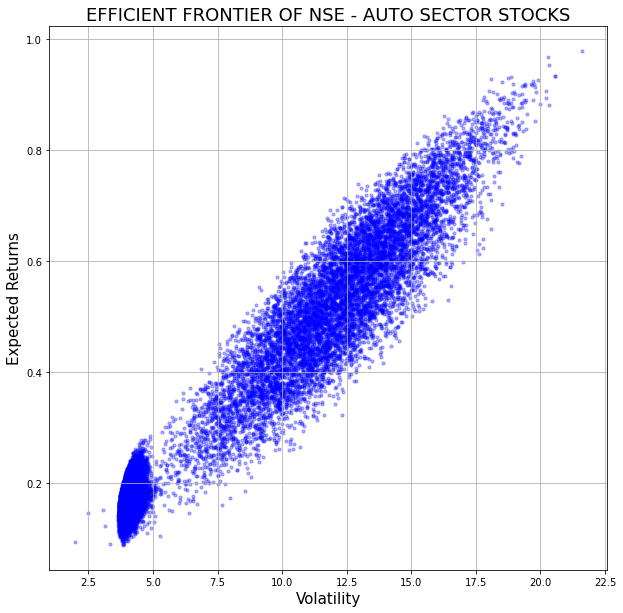

In [256]:
#Plotting of Efficient Frontier 
efficient_frontier.plot.scatter(x="Volatility",y='Returns',marker="o",color='b',
                               s=10,alpha=0.3,grid=True,figsize=(10,10))
plt.title('EFFICIENT FRONTIER OF NSE - AUTO SECTOR STOCKS',fontsize=18)
plt.xlabel("Volatility",fontsize=15)
plt.ylabel("Expected Returns",fontsize=15)

In [197]:
#Minimum Volatility 
minimum_volatility_portfolio=efficient_frontier.iloc[efficient_frontier["Volatility"].idxmin()]
minimum_volatility_portfolio



Returns                    0.094929
Volatility                 2.433488
Ashok Leyland weight       0.079509
Hero Motors Corp weight    0.018513
Mahindra weight            0.154778
Maruti Suzuki weight       0.055545
Tata Motors weight         0.185374
TVS Motors weight          0.064955
Name: 6415, dtype: float64

In [198]:
# Highest Sharpe Ratio
rf=0.02
sharpe_ratio_portfolio=efficient_frontier.iloc[((efficient_frontier['Returns']-rf)/efficient_frontier['Volatility']).idxmax()]
sharpe_ratio_portfolio

Returns                    0.465503
Volatility                 7.665313
Ashok Leyland weight       0.200623
Hero Motors Corp weight    0.074649
Mahindra weight            0.005408
Maruti Suzuki weight       0.726940
Tata Motors weight         0.034467
TVS Motors weight          0.746784
Name: 3981, dtype: float64

Text(0, 0.5, 'Expected Returns')

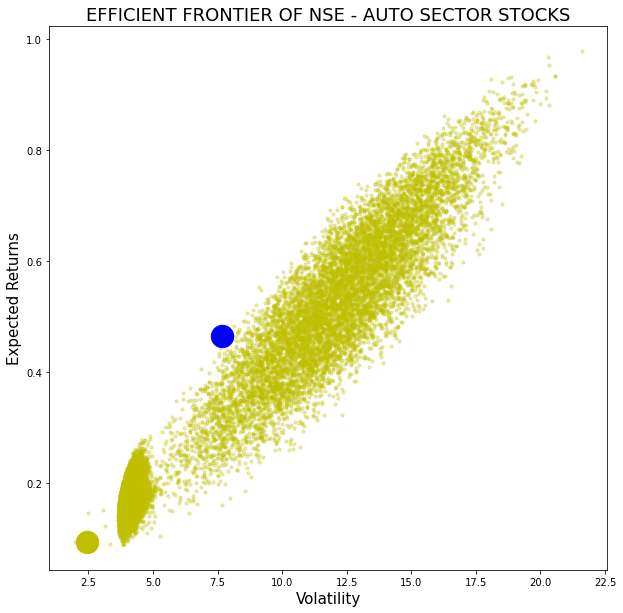

In [261]:
plt.subplots(figsize=(10,10))
plt.scatter(efficient_frontier['Volatility'], efficient_frontier['Returns'], marker='o', s=10, alpha=0.3, color='y')
plt.scatter(minimum_volatility_portfolio[1],minimum_volatility_portfolio[0],color='y',marker='o',s=500)
plt.scatter(sharpe_ratio_portfolio[1],sharpe_ratio_portfolio[0],color='b',marker='o',s=500)
plt.title('EFFICIENT FRONTIER OF NSE - AUTO SECTOR STOCKS',fontsize=18)
plt.xlabel("Volatility",fontsize=15)
plt.ylabel("Expected Returns",fontsize=15)
